In [ ]:
'''
Title: Diffusion Limited Aggregation

Goals: 
-Use lists to store points
-Implement boundary functions
-Animate particle walk and crystal growth

Method:
1) Lists: seeds,points. Seeds to store crystal, points to store free particles, setup()

2) place a bunch of random particles in points, fillpoints()

3) Move particles randomly all in same iteration, step()

4) If edge is hit, invoke boundary conditions, move to opposite side, check()

5) If points in point meets particle in seeds, move that xy-pair to seeds, check()

6) Plot coordinates in seeds, plotalist()

7) Animate particle walk and crystal growth
    
'''

In [6]:
import numpy as np
import numpy.random as rand
%matplotlib inline 
from matplotlib import pyplot as plt

def setup():
    np = 200
    bsize = 50
    points = []
    seeds = [[int(bsize/2),int(bsize/2)]]
    points = fillpoints(np,bsize)
    print('# of Particles:',np,'\n'
          'Size of Box (n X n):',bsize)
    return np,bsize,points,seeds

def fillpoints(np,bsize):
    for np in range(np):
        x = rand.randint(0,bsize)
        y = rand.randint(0,bsize)
        points.append([x,y])
    return points

def step(points):
    points1 = [[number + rand.randint(-1,2) for number in group] for group in points]
    for i in range(len(points1)):             #boundary loop. probably can be done with 2 list comprehensions
        for j in range(len(points1[0])):
            if points1[i][j] <= 0:            #boundary conditions
                points1[i][j] = bsize
            elif points1[i][j] >= bsize:      #boundary conditions
                points1[i][j] = 0
    points = points1
    return points

def check(seeds,points):
    neighbors = []
    for seed in seeds:
        neighbors.append([seed[0],seed[1]+1])
        neighbors.append([seed[0],seed[1]-1])
        neighbors.append([seed[0]+1,seed[1]])
        neighbors.append([seed[0]-1,seed[1]])
    move = []
    for point in points:
        if point in neighbors:
            move.append(point)
    for point in move:
        seeds.append(point)
        points.remove(point)
    return seeds,points

#The Business End:
def dla(seeds,points,np):
    while len(points) >= (np/4):    
        points = step(points)
        seeds,points = check(seeds,points)
    print(len(seeds),len(points))
    return seeds,points

def plotalist(mylist):
    x,y = zip(*mylist)
    plt.scatter(x,y)
    plt.show

# of Particles: 200 
Size of Box (n X n): 50
352 49


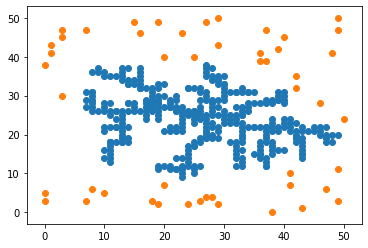

In [7]:
#Example Run:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

np = 400
bsize = 100
points = []
seeds = [[int(bsize/2),int(bsize/2)]]

np,bsize,points,seeds = setup()
points = fillpoints(np,bsize)
seeds,points = dla(seeds,points,np)

plotalist(seeds)     #blue
plotalist(points)    #orange

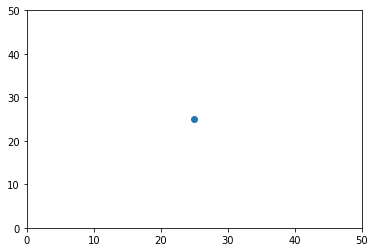

In [8]:
#Animate growing crystal:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

seedx, seedy = zip(*seeds)
pointx, pointy = zip(*points)

fig = plt.figure()
plt.xlim(0,bsize)
plt.ylim(0,bsize)
graph = plt.scatter([], [])

def animate(i):
    graph.set_offsets(np.vstack((seedx[:i+1], seedy[:i+1])).T)
    #graph.set_offsets(np.vstack((pointx[:i+1], pointy[:i+1])).T)
    return graph

ani = FuncAnimation(fig, animate, frames=len(seeds))
from IPython.display import HTML
HTML(ani.to_jshtml())